# Ініціалізація датасету

В датасеті записана інформація про стан атмосфери в місті Єна(Німеччина).

Дані взяті з https://www.kaggle.com/pankrzysiu/weather-archive-jena

Columns

1.   Date Time
2.p (mbar)atmospheric pressure
3.T (degC)temperature
4.Tpot (K)potential temperature
5.Tdew (degC)dew point temperature
6.rh (%)relative humidity
7.VPmax (mbar)saturation water vapor pressure
8.VPact (mbar)actual water vapor pressure
9.VPdef (mbar)water vapor pressure deficit
10.sh (g/kg)specific humidity
11.H2O (mmol/mol)water vapor concentration
12.rho (g/m**3)air density
13.wv (m/s)wind velocity
14.max. wv (m/s)maximum 
15.wd_(deg) wind velocity

In [0]:
# підключимо бібліотеку pandas для обробки даних (вона вже встановлена в Colab)
import pandas as pd

# зазначимо url звідки ми візьмемо дані
url = "https://raw.githubusercontent.com/Aarrtteemm123/dataset-weather/master/jena_climate_2009_2016.csv"

# створимо pandas Dataframe з csv-файлу, який ми отримаємо по вищезазначеному url
# Dataframe надасть нам необхідні можливості для обробки даних
df = pd.read_csv(url)

# відобразимо перші 5 записів у датафреймі (достатньо, щоб побачити структуру записів у ньому)
df.head()

,Date_Time,p_(mbar),T_(degC),Tpot_(K),Tdew_(degC),rh (%),Vpmax_(mbar),Vpact_(mbar),Vpdef_(mbar),sh_(g/kg),H2OC_(mmol/mol),rho_(g/m**3),wv_(m/s),max._wv_(m/s),wd_(deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


# Коефіцієнт кореляції Пірсона та p-рівня значимості

Приклад обчислення коефіцієнта кореляції Пірсона та p-рівня значимості за двома параметрами: температури повітря та відносної вологості.
Коефіцієнт кореляції Пірсона менший 0,а це означає що при збільшені температури відносна вологость повітря зменшується, а також існує значна залежність між цими двома величинами(це фізичний факт).

P-рівень значимості показує яка частина данних не підходять під нашу гіпотезу,в нашому випадку p=0, а тому нульову гіпотезу можна відкинути(Вона протилежна до основної гіпотези і передбачає в данному випадку що залежності між температурою та вологістю немає)

In [0]:
# Приклад обчислення коефіцієнта кореляції Пірсона та p-рівня значимості за допомогою scipy.stats
# https://stackoverflow.com/a/52245789/8219611
import pandas as pd 
from scipy import stats

data = {'temp':df['T_(degC)'],'humidity':df['rh (%)']}
df2 = pd.DataFrame(data, columns = ['temp','humidity'])
pearson_coef, p_value = stats.pearsonr(df2["temp"], df2["humidity"])
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

Pearson Correlation Coefficient:  -0.5607062165830151 and a P-value of: 0.0


# Приклад застосування регресії

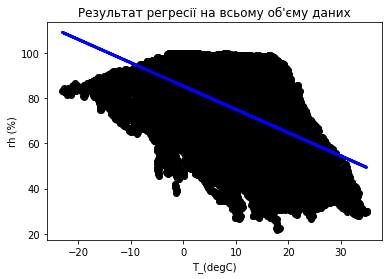

In [0]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

df['T_(degC)'].fillna(0, inplace=True)
df['rh (%)'].fillna(0, inplace=True)
X = df['T_(degC)'].values
Y = df['rh (%)'].values
X = X.reshape(df['T_(degC)'].shape[0], 1)
Y = Y.reshape(df['rh (%)'].shape[0], 1)

# Розділимо дані температури на вибірку для тренування моделі та її перевірку
X_train = X[:95000]
X_test = X[-5000:]
 
# Розділимо дані по вологості на вибірку для тренування моделі та її перевірку
Y_train = Y[:95000]
Y_test = Y[-5000:]

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

plt.title('Результат регресії на всьому об\'єму даних')
plt.xlabel('T_(degC)')
plt.ylabel('rh (%)')
# plot it as in the example at http://scikit-learn.org/
plt.scatter(X, Y,  color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()

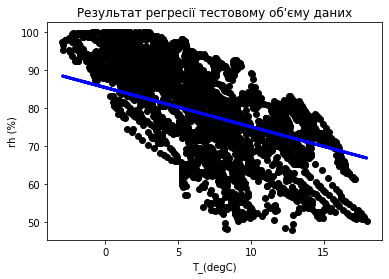

In [0]:
plt.title('Результат регресії тестовому об\'єму даних')
plt.xlabel('T_(degC)')
plt.ylabel('rh (%)')
# plot it as in the example at http://scikit-learn.org/
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue', linewidth=3)
plt.show()

# Відповіді на запитання до теми "ЕМПІ №8-9: Кореляція та регресія v2019"



> 1.Кореляцію використовують для пошуку зв'язку між величинами,але не завжди такий зв'язок є справжнім,тому потрібно адекватно її використовувати(Н-п. не шукати залежність між ціною акцій компанії по випуску програмного забезпечення та популяцією якогось виду риби,хоча при бажанні її можна знайти)

> Регресія - це форма зв'язку між випадковими величинами. Закон зміни математичного очікування однієї випадкової величини залежно від значень іншої.
Вона показує "напрямок" залежності величин,їхню тенденцію.